In [218]:
### Use data from F4_1 to visualize ligand target correlations and potential interactions

#############################################
# Prerequisites - Load Libraries

In [219]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1//lib/R/library"


In [220]:
source('MS4_Plot_Config.r')

###############################################
# Preqrequisites Configurations & Parameters

In [221]:
data_path = '../data/current'

In [222]:
result_path = '../results/current'

In [223]:
data_path

[1] "../data/current"

In [224]:
### Decide which data to load from F4_1

In [225]:
name = 'V_FINAL'  # of dataset to load, prepared and combined data of E1 - skip E2 step 

In [226]:
weight_views = FALSE

In [227]:
### Version of the pre-processed data to load

In [228]:
mofa_name = 'V_FINAL_INTEGRATED'

In [229]:
filter_samples = 'all'
#filter_samples = 'acs_w_o_infection_ccs'
#filter_samples = 'no_ccs_ccs'

# Load Data 

## Sample Data

In [230]:
path = paste0(result_path, '/00_Data_Overview/Merged_Sample_Meta_Data.csv')
sample_data = read.csv(path)
print(file.info(path)$mtime)

[1] "2023-12-10 11:16:00 CET"


## Prepared combined data

In [231]:
### Load pre-processed and combined data from E scripts

In [232]:
path = paste0(result_path, '/E-Analysis/Combined_Data_',name,'.csv')
data_long = read.csv(path)
print(path)
print(file.info(path)$mtime)

[1] "../results/current/E-Analysis/Combined_Data_V_FINAL.csv"
[1] "2024-01-03 14:22:52 CET"


In [233]:
head(data_long,2)

,X,sample_id,type,variable,value,config
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1,k10,single_cell,X0_T.cell.CD4__SSU72,0.5896835,FALSE-FALSE-TRUE-0.2-FALSE-TRUE-
2,2,k10,single_cell,X0_T.cell.CD4__PARK7,0.8587511,FALSE-FALSE-TRUE-0.2-FALSE-TRUE-


In [234]:
nrow(data_long)

[1] 1557939

In [235]:
#### Filter data based on selected samples

In [236]:
if(filter_samples == 'all'){
    filter = unique(sample_data$sample_id)
    }


if(filter_samples == 'acs_w_o_infection_ccs'){
    filter =unique(sample_data$sample_id[sample_data$classification %in% c('ccs', 'acs_w_o_infection')])
    
    }

if(filter_samples == 'no_ccs_ccs'){
    filter =unique(sample_data$sample_id[sample_data$classification %in% c('vollstaendiger_ausschluss','ccs','koronarsklerose')])
    
    }

In [237]:
length(filter)

[1] 146

In [238]:
#filter

In [239]:
nrow(data_long)

[1] 1557939

In [240]:
data_long = data_long[data_long$sample_id %in% filter,]

In [241]:
nrow(data_long)

[1] 1557939

In [242]:
### Also load completely normalized data (for violin plots)

In [243]:
path = paste0(result_path, '/E-Analysis/Combined_Data_',name,'_INTEGRATED', '.csv')
data_long_normalized = read.csv(path)
print(path)
print(file.info(path)$mtime)

[1] "../results/current/E-Analysis/Combined_Data_V_FINAL_INTEGRATED.csv"
[1] "2024-01-03 14:26:41 CET"


In [244]:
head(data_long_normalized,2)

,X,sample_id,variable,value,type
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1,k1,CK,-2.397022,clinical_data
2,2,k10,CK,NA,clinical_data


## Nichenet data

In [245]:
# Load data from nichenet database about regulatory potential

In [246]:
ligand_target_matrix = readRDS(url("https://zenodo.org/record/3260758/files/ligand_target_matrix.rds"))  # gene-gene regulatory scores
# gives the regulatory potential of a target gene based on the ligand-tf & tf- target-gene links and weights of the signaling and gr network (multiply PPR of each ligand -tf  pair with the weights of the gr network)

In [247]:
### Generate data in long format

In [248]:
ligand_target_matrix_long = melt(ligand_target_matrix)

In [249]:
colnames(ligand_target_matrix_long) = c('target', 'ligand', 'regulatory_potential')

In [250]:
head(ligand_target_matrix_long,2)

,target,ligand,regulatory_potential
,<fct>,<fct>,<dbl>
1,A1BG,CXCL1,0.0003534343
2,A1BG-AS1,CXCL1,0.0001650894


## Prepared expression and correlation data

In [251]:
## Load data from F4_1 about ligand/ receptor expression and ligand- receptor / ligand- target correlations

In [252]:
name

[1] "V_FINAL"

In [253]:
load_path = paste0(result_path, '/F-Analysis/' ,'F4_Ligand_Receptor_Data_Expression', name,filter_samples, '.gz')
ligand_receptor_expression = fread(load_path)
print(load_path)
print(file.info(load_path)$mtime)

Warning message in fread(load_path):
“Detected 11 column names but the data has 12 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] "../results/current/F-Analysis/F4_Ligand_Receptor_Data_ExpressionV_FINALall.gz"
[1] "2024-01-05 18:00:40 CET"


In [254]:
head(ligand_receptor_expression,2)

V1,interaction_type,gene,type,cluster,perc_cells_expressing_gene,total_amount_cells_expressing_gene,ident,mean_expr,var_expression,cell_type,cluster_vis
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,Ligand,A2M,proteomics,proteomics,69.10381,NA,proteomics_0_A2M_P01023,8.7445302,0.32468578,proteomics,NA
2,Ligand,ADAM17,single_cell,X4_Monocytes...CD14,49.68889,7267,single_cell_0_X4_Monocytes...CD14__ADAM17,0.8383966,0.03136488,Monocytes...CD14,3


In [255]:
load_path = paste0(result_path, '/F-Analysis/' ,'F4_Ligand_Receptor_Data', name,filter_samples, '.gz')
ligand_receptor_correlation = fread(load_path)
print(load_path)
print(file.info(load_path)$mtime)

Warning message in fread(load_path):
“Detected 27 column names but the data has 28 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] "../results/current/F-Analysis/F4_Ligand_Receptor_DataV_FINALall.gz"
[1] "2024-01-05 18:00:53 CET"


In [256]:
head(ligand_receptor_correlation,2)

V1,ident,ident_R,Receptor,Ligand,amount_sources,weight,interaction_type,type,cluster,⋯,type_R,cluster_R,perc_cells_expressing_gene_R,total_amount_cells_expressing_gene_R,mean_expr_R,var_expression_R,cell_type_R,cluster_vis_R,variable_R,correlation
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,cytokine_0_BCA1__CXCL13,neutrophil_0_CXCR4,CXCR4,CXCL13,1,0.2788696,Ligand,cytokine,cytokine,⋯,neutrophil,neutrophil,69.10381,NA,3.484843,0.7122165,neutrophil,1,neutrophil_0_CXCR4,-0.1336829
2,cytokine_0_BCA1__CXCL13,neutrophil_0_FPR2,FPR2,CXCL13,1,0.1930190,Ligand,cytokine,cytokine,⋯,neutrophil,neutrophil,69.10381,NA,2.568535,0.9156551,neutrophil,NA,neutrophil_0_FPR2,0.1266091


In [257]:
load_path = paste0(result_path, '/F-Analysis/' ,'F4_Ligand_Target_Data', name,filter_samples, '.gz')
ligand_target_correlation = fread(load_path)
print(load_path)
print(file.info(load_path)$mtime)

Warning message in fread(load_path):
“Detected 12 column names but the data has 13 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] "../results/current/F-Analysis/F4_Ligand_Target_DataV_FINALall.gz"
[1] "2024-01-05 18:08:54 CET"


In [258]:
head(ligand_target_correlation,2)

V1,Ligand_Gene,Target_Gene,cluster,Ligand,Target,correlation,Target_Type,Ligand_Type,regulatory_potential,regulatory_potential_scaled,Target_Cell_Type,Ligand_Cell_Type
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,ADAM17,A1BG,proteomics,single_cell_0_X6_Monocytes...CD14__ADAM17,proteomics_0_A1BG_M0R009,-0.1841739,proteomics,single_cell_0_X6_Monocytes...CD14,0.0004622894,0.01667641,proteomics,Monocytes...CD14
2,ADAM17,A1BG,proteomics,single_cell_0_X4_Monocytes...CD14__ADAM17,proteomics_0_A1BG_M0R009,-0.1387664,proteomics,single_cell_0_X4_Monocytes...CD14,0.0004622894,0.01667641,proteomics,Monocytes...CD14


In [259]:
###  Adjust texts  to have nice cluster descriptions

In [260]:
ligand_target_correlation$Ligand_Cluster_Text = ligand_target_correlation$Ligand_Type
ligand_target_correlation$Target_Cluster_Text = ligand_target_correlation$Target_Type

In [261]:
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X0_T.cell.CD4', 'CD4+ T cells (Cluster 0)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'clinical_data', 'Clinical')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X1_T.cell.CD8', 'CD8+ T cells (Cluster 1)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X10_B.cell', 'B cells (Cluster 10)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X11_T.cell.CD4', 'CD4+ T cells (Cluster 11)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X12_Monocytes...CD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 12)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X13_Dendritic',  'Dendritic cells (Cluster 13)')
ligand_target_correlation$Ligand_Cluster_Text= str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X2_T.cell.CD4', 'CD4+ T cells (Cluster 2)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X3_NK', 'NK cells (Cluster 3)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X4_Monocytes...CD14', 'CD14(high) Monocytes (Cluster 4)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X5_T.cell.CD4', 'CD4+ T cells (Cluster 5)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X6_Monocytes...CD14','CD14(high) Monocytes (Cluster 6)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X7_Monocytes...CD14', 'CD14(high) Monocytes (Cluster 7)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X8_B.cell','B cells (Cluster 8)')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text , 'single_cell_0_X9_Monocytes...CD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 9)')

ligand_target_correlation$Ligand_Cluster_Text  = str_replace(ligand_target_correlation$Ligand_Cluster_Text  , 'clinical','Clinical')
ligand_target_correlation$Ligand_Cluster_Text  = str_replace(ligand_target_correlation$Ligand_Cluster_Text  , 'cytokine','Cytokine')
ligand_target_correlation$Ligand_Cluster_Text  = str_replace(ligand_target_correlation$Ligand_Cluster_Text  , 'neutrophil','Neutrophil')
ligand_target_correlation$Ligand_Cluster_Text = str_replace(ligand_target_correlation$Ligand_Cluster_Text  , 'proteomics','Proteomics')

In [262]:
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X0_T.cell.CD4', 'CD4+ T cells (Cluster 0)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'clinical_data', 'Clinical')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X1_T.cell.CD8', 'CD8+ T cells (Cluster 1)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X10_B.cell', 'B cells (Cluster 10)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X11_T.cell.CD4', 'CD4+ T cells (Cluster 11)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X12_Monocytes...CD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 12)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X13_Dendritic',  'Dendritic cells (Cluster 13)')
ligand_target_correlation$Target_Cluster_Text= str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X2_T.cell.CD4', 'CD4+ T cells (Cluster 2)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X3_NK', 'NK cells (Cluster 3)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X4_Monocytes...CD14', 'CD14(high) Monocytes (Cluster 4)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X5_T.cell.CD4', 'CD4+ T cells (Cluster 5)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X6_Monocytes...CD14','CD14(high) Monocytes (Cluster 6)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X7_Monocytes...CD14', 'CD14(high) Monocytes (Cluster 7)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X8_B.cell','B cells (Cluster 8)')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text , 'single_cell_0_X9_Monocytes...CD16_FCGR3A','FCGR3A(high) Monocytes (Cluster 9)')

ligand_target_correlation$Target_Cluster_Text  = str_replace(ligand_target_correlation$Target_Cluster_Text  , 'clinical','Clinical')
ligand_target_correlation$Target_Cluster_Text  = str_replace(ligand_target_correlation$Target_Cluster_Text  , 'cytokine','Cytokine')
ligand_target_correlation$Target_Cluster_Text  = str_replace(ligand_target_correlation$Target_Cluster_Text  , 'neutrophil','Neutrophil')
ligand_target_correlation$Target_Cluster_Text = str_replace(ligand_target_correlation$Target_Cluster_Text  , 'proteomics','Proteomics')

In [263]:
unique(ligand_target_correlation$Ligand_Cluster_Text)

[1] "CD14(high) Monocytes (Cluster 6)"    "CD14(high) Monocytes (Cluster 4)"   
 [3] "Neutrophil"                          "CD4+ T cells (Cluster 0)"           
 [5] "CD8+ T cells (Cluster 1)"            "CD4+ T cells (Cluster 2)"           
 [7] "CD4+ T cells (Cluster 5)"            "Dendritic cells (Cluster 13)"       
 [9] "FCGR3A(high) Monocytes (Cluster 12)" "NK cells (Cluster 3)"               
[11] "CD14(high) Monocytes (Cluster 7)"    "FCGR3A(high) Monocytes (Cluster 9)" 
[13] "B cells (Cluster 10)"                "CD4+ T cells (Cluster 11)"          
[15] "B cells (Cluster 8)"                 "Cytokine"

In [264]:
unique(ligand_target_correlation$Target_Cluster_Text)

[1] "Proteomics"                          "FCGR3A(high) Monocytes (Cluster 12)"
 [3] "NK cells (Cluster 3)"                "CD4+ T cells (Cluster 5)"           
 [5] "CD8+ T cells (Cluster 1)"            "CD4+ T cells (Cluster 11)"          
 [7] "CD4+ T cells (Cluster 2)"            "CD4+ T cells (Cluster 0)"           
 [9] "B cells (Cluster 10)"                "Neutrophil"                         
[11] "FCGR3A(high) Monocytes (Cluster 9)"  "B cells (Cluster 8)"                
[13] "Dendritic cells (Cluster 13)"        "Clinical"                           
[15] "CD14(high) Monocytes (Cluster 4)"    "CD14(high) Monocytes (Cluster 6)"   
[17] "CD14(high) Monocytes (Cluster 7)"

In [265]:
### Extract cluster numbers for descriptions

In [266]:
ligand_target_correlation$Ligand_Cluster_Number = str_replace_all(ligand_target_correlation$Ligand_Cluster_Text, '.*Cluster |\\)', '')
ligand_target_correlation$Target_Cluster_Number = str_replace_all(ligand_target_correlation$Target_Cluster_Text, '.*Cluster |\\)', '')

In [267]:
unique(ligand_target_correlation$Target_Cluster_Number)

[1] "Proteomics" "12"         "3"          "5"          "1"         
 [6] "11"         "2"          "0"          "10"         "Neutrophil"
[11] "9"          "8"          "13"         "Clinical"   "4"         
[16] "6"          "7"

In [268]:
### Extract Cell-Types without Cluster

In [269]:
ligand_target_correlation$Ligand_Cell_Type = str_replace_all(ligand_target_correlation$Ligand_Cluster_Text, ' \\(Cluster.*', '')
ligand_target_correlation$Target_Cell_Type = str_replace_all(ligand_target_correlation$Target_Cluster_Text, ' \\(Cluster.*', '')

In [270]:
unique(ligand_target_correlation$Ligand_Cell_Type )

[1] "CD14(high) Monocytes"   "Neutrophil"             "CD4+ T cells"          
[4] "CD8+ T cells"           "Dendritic cells"        "FCGR3A(high) Monocytes"
[7] "NK cells"               "B cells"                "Cytokine"

## Load MOFA model and extract weight data

In [271]:
model_name = paste0("MOFA_MODEL", mofa_name, '-', weight_views, '.hdf5')

In [272]:
model_name

[1] "MOFA_MODELV_FINAL_INTEGRATED-FALSE.hdf5"

In [273]:
outfile = file.path( paste0(result_path, '/E-Analysis/',  model_name) )

In [274]:
print(file.info(outfile)$mtime)

[1] "2024-01-03 14:33:17 CET"


In [275]:
outfile

[1] "../results/current/E-Analysis/MOFA_MODELV_FINAL_INTEGRATED-FALSE.hdf5"

In [276]:
model <- load_model(outfile)

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 9, 12, 17 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


In [277]:
### Extract weight data

In [278]:
weights = get_weights(model, views = "all", factors = "all")

In [279]:
weight_data = data.frame()

In [280]:
for (i in names(weights)){
    data = data.frame(weights[[i]])
    data$type = i
    weight_data = rbind(weight_data,data)
    }

In [281]:
weight_data$variable_name = rownames(weight_data)

In [282]:
head(weight_data,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,type,variable_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CK,-0.13418597,0.4019222,-0.1010765,-0.002177566,-0.5093667,0.24179134,-0.03635097,0.05304519,0.0011574664,-0.012307130,⋯,-0.1604505,-0.001418618,0.1540945,0.003821864,-0.24205661,0.004092582,-0.0005618720,-0.2423944,clinical_data,CK
CK_MB,-0.06222621,0.2731985,-0.2000362,-0.076098327,-0.1439445,0.04289833,-0.71818597,0.18658970,-0.0007753517,-0.003074308,⋯,-0.6107162,0.002499494,0.3864464,-0.001090137,-0.08311704,0.009503498,-0.0003621744,0.2060158,clinical_data,CK_MB


In [283]:
### Prepare feature weight in long format

In [284]:
feature_weights = weight_data

In [285]:
feature_weights$type_cluster = weight_data$type

In [286]:
feature_weights$type[!feature_weights$type %in% c('clinical_data', 'cytokine', 'neutrophil', 'proteomics')] = 'single_cell'

In [287]:
feature_weights$variable_name_conc = paste0(feature_weights$type, '_0_', feature_weights$variable_name)

In [288]:
feature_weights_long = melt(feature_weights) #TBD: put in a seperate 'chapter'

Using type, variable_name, type_cluster, variable_name_conc as id variables



In [289]:
head(feature_weights_long,2)

,type,variable_name,type_cluster,variable_name_conc,variable,value
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,clinical_data,CK,clinical_data,clinical_data_0_CK,Factor1,-0.13418597
2,clinical_data,CK_MB,clinical_data,clinical_data_0_CK_MB,Factor1,-0.06222621


In [290]:
### based on feature - weights long calculate amount of features per dimension

In [291]:
amount_features_per_dimension = feature_weights_long[feature_weights_long$variable == 'Factor1',] %>% group_by(type_cluster) %>% count()

In [292]:
colnames(amount_features_per_dimension) = c('type_cluster', 'amount_features')

In [293]:
head(amount_features_per_dimension,2)

type_cluster,amount_features
<chr>,<int>
X0_TcellCD4,688
X10_Bcell,796


In [294]:
amount_features_per_dimension = merge(amount_features_per_dimension, amount_features_per_dimension, by = NULL)

In [295]:
amount_features_per_dimension$combined_amount = amount_features_per_dimension$amount_features.x * amount_features_per_dimension$amount_features.y

In [296]:
amount_features_per_dimension$amount_features.y = NULL
amount_features_per_dimension$amount_features.x = NULL

In [297]:
colnames(amount_features_per_dimension) = c('Ligand_Type', 'Target_Type', 'combined_amount_features')

# Visualize Expression Data

In [298]:
## Visualize the expression of ligands and receptors in the different clusters

In [299]:
head(ligand_receptor_expression,2)

V1,interaction_type,gene,type,cluster,perc_cells_expressing_gene,total_amount_cells_expressing_gene,ident,mean_expr,var_expression,cell_type,cluster_vis
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,Ligand,A2M,proteomics,proteomics,69.10381,NA,proteomics_0_A2M_P01023,8.7445302,0.32468578,proteomics,NA
2,Ligand,ADAM17,single_cell,X4_Monocytes...CD14,49.68889,7267,single_cell_0_X4_Monocytes...CD14__ADAM17,0.8383966,0.03136488,Monocytes...CD14,3


In [300]:
plot_data = ligand_receptor_expression

In [301]:
plot_data$cluster_number = str_replace_all(plot_data$cluster, 'X|_.*', '')

In [302]:
unique(plot_data$cluster_number)

[1] "proteomics" "4"          "6"          "neutrophil" "1"         
 [6] "7"          "5"          "3"          "12"         "0"         
[11] "9"          "2"          "11"         "13"         "10"        
[16] "8"          "cytokine"

In [303]:
### Filter for visualization (minimum amount of cell expressing gene)

In [304]:
perc_cells_expressing_gene_var = 50

In [305]:
filter_type_vis = c('proteomics', 'cytokine', 'neutrophil') # filter out non-single-cell types

In [306]:
#unique(plot_data$perc_cells_expressing_gene)

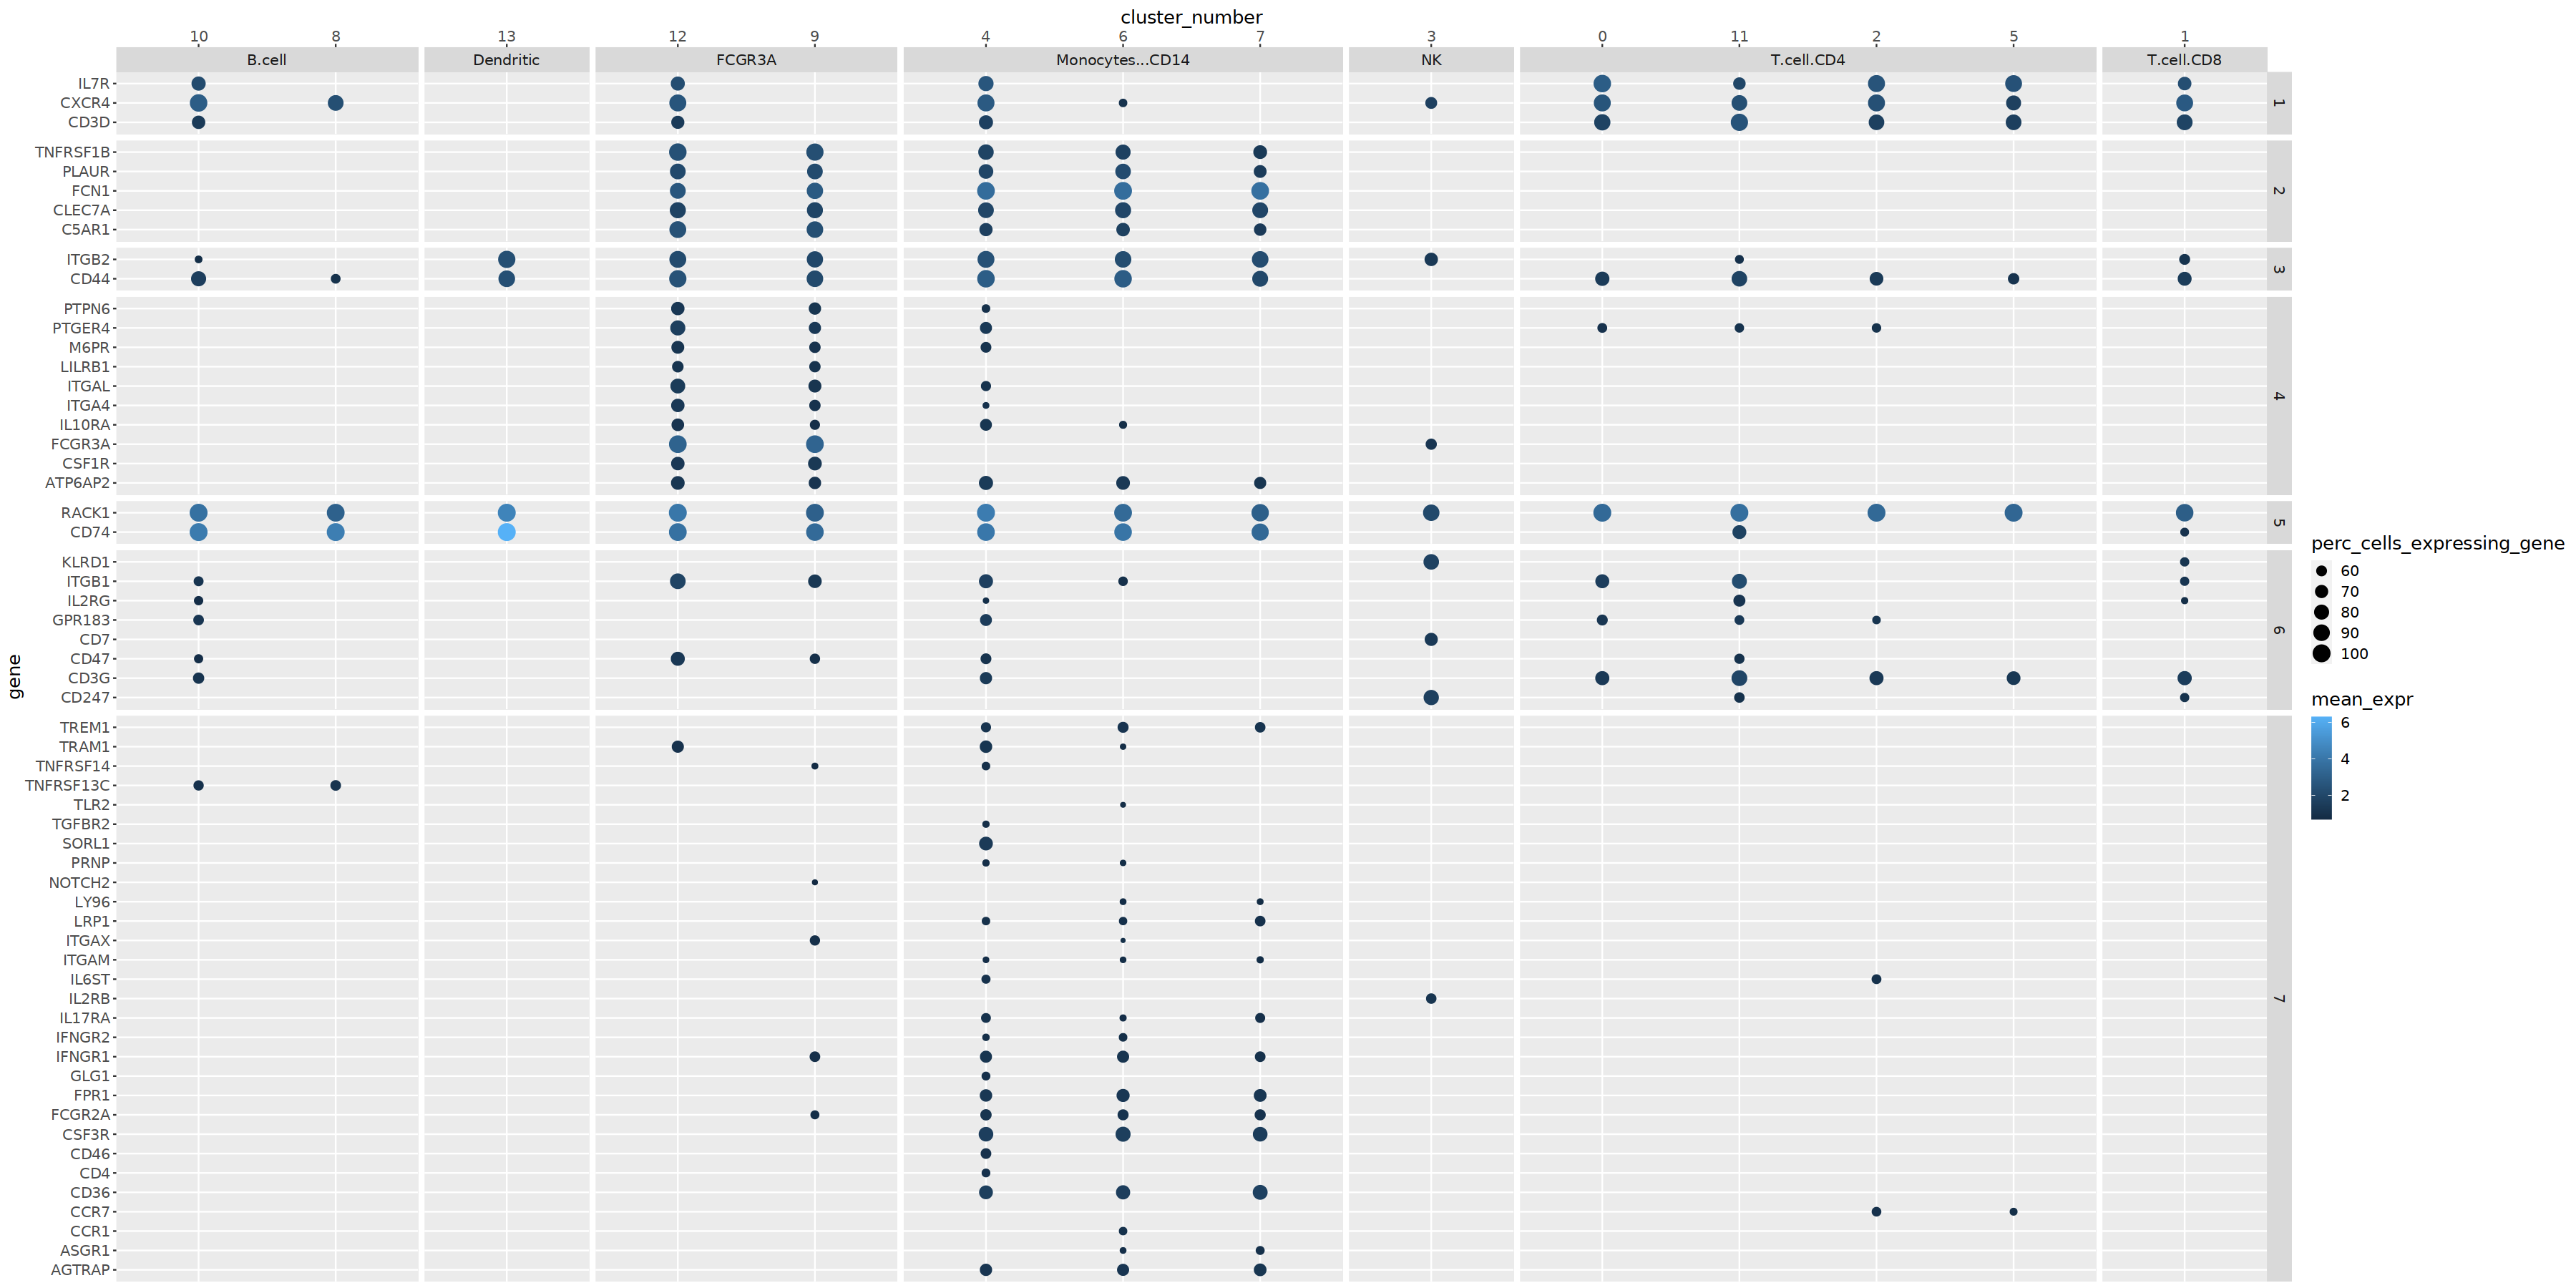

In [307]:
### Visualize all receptors
options(repr.plot.width=30, repr.plot.height=15)
ggplot(plot_data[(plot_data$interaction_type == 'Receptor') & (!plot_data$type %in% filter_type_vis) & (plot_data$perc_cells_expressing_gene > perc_cells_expressing_gene_var),], aes(x = cluster_number, y= gene)) + geom_point(aes(col=mean_expr, size=perc_cells_expressing_gene))  + facet_grid(cluster_vis~cell_type , space = 'free' , scales = 'free')  + theme(text = element_text(size=15), axis.text.x=element_text(angle=0)) + scale_x_discrete(position = "top") 

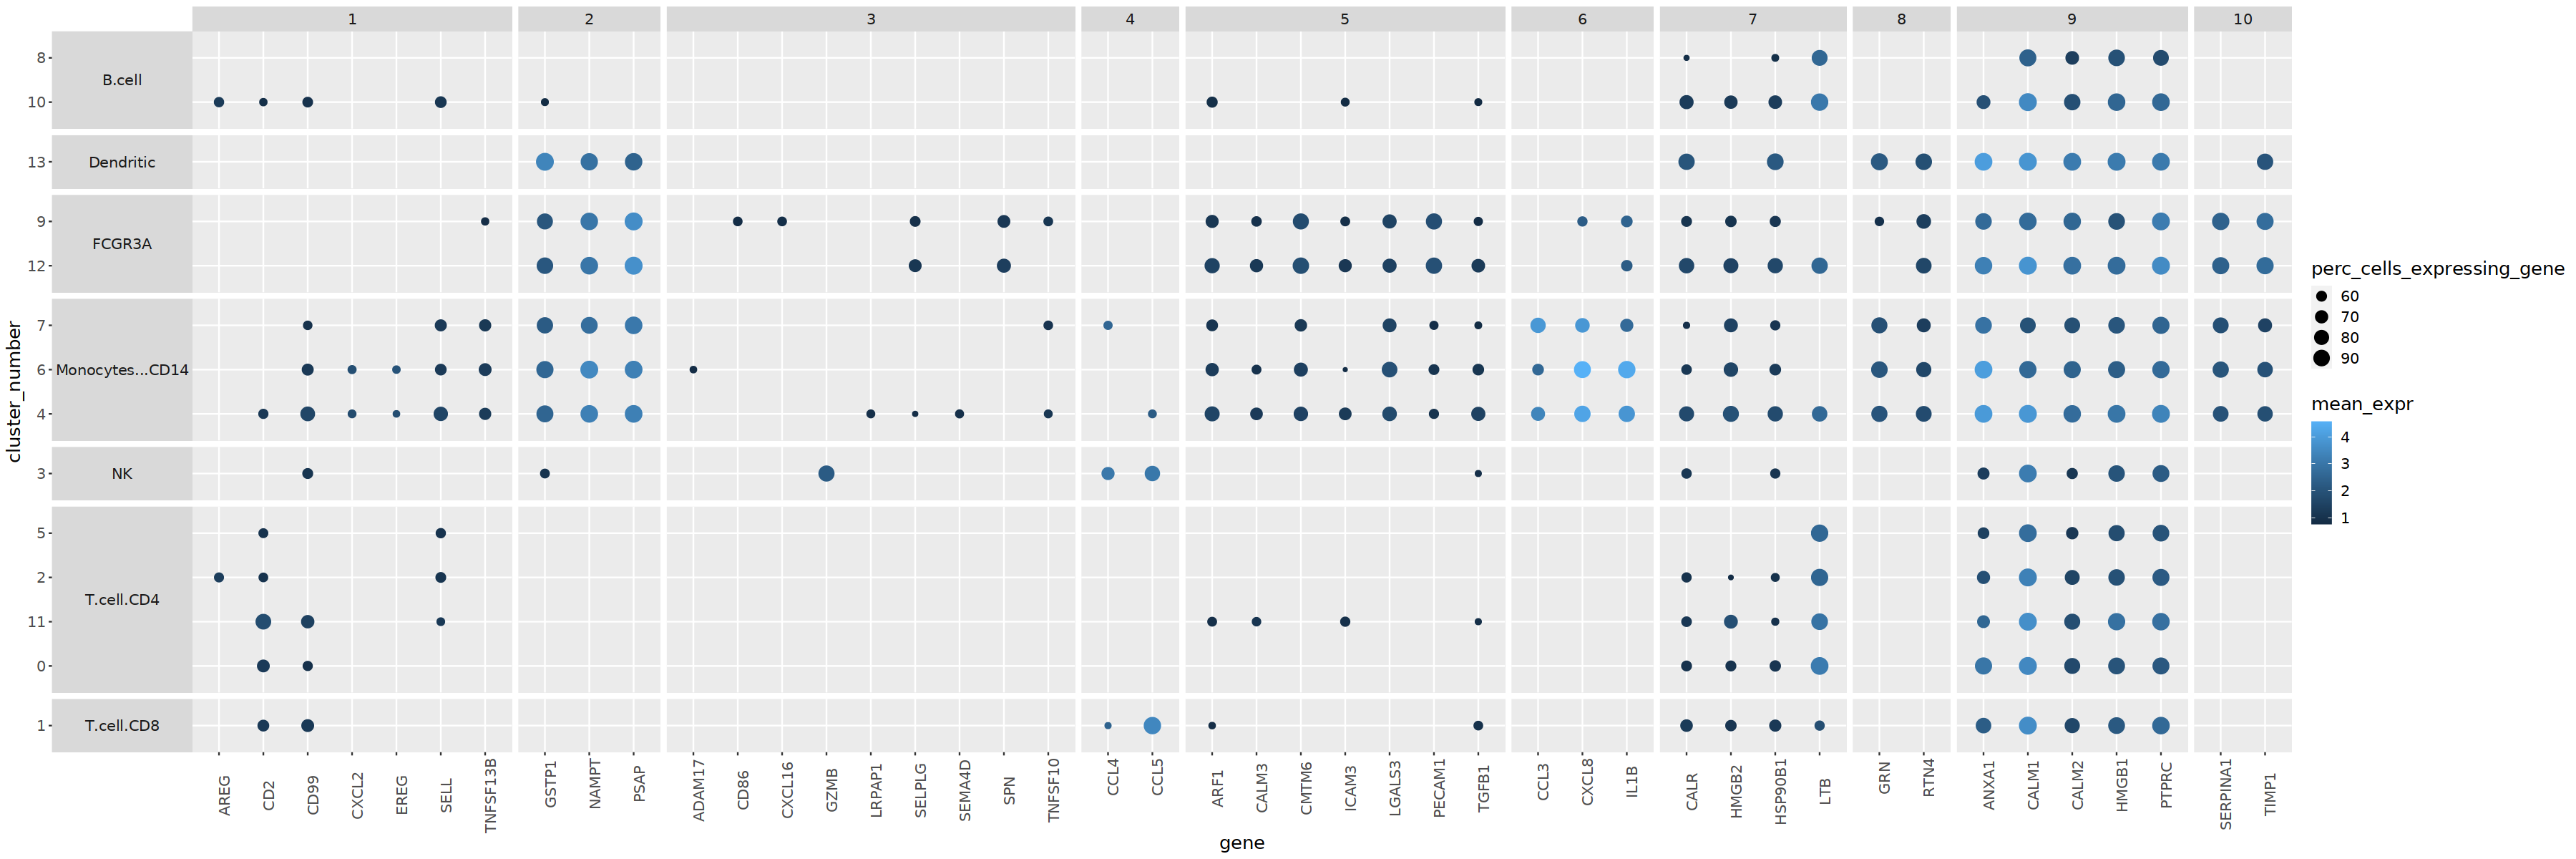

In [308]:
###  Visualize all ligands
options(repr.plot.width=30, repr.plot.height=10)
ggplot(plot_data[(plot_data$interaction_type == 'Ligand' & (!plot_data$type %in% filter_type_vis)) &  (plot_data$perc_cells_expressing_gene > perc_cells_expressing_gene_var) ,], aes(x = gene, y= cluster_number)) + geom_point(aes(col=mean_expr, size=perc_cells_expressing_gene)) + facet_grid(cell_type ~cluster_vis, space = 'free' , scales = 'free', switch = 'y')  + theme(text = element_text(size=15), axis.text.x=element_text(angle=90), strip.text.y.left = element_text(angle = 0)) 

# Visualize Ligand Target Correlations

## Circoplot Visualization

### Factor specific - visualize highest ligand target correlations

In [309]:
## define correlations that should be visualized (here ligand- target; alternative: ligand-receptor)
data_vis = ligand_target_correlation

In [310]:
## round correlations
data_vis$correlation = round(data_vis$correlation,2)

#### Parameters for visualization

In [311]:
head(data_vis,2)

V1,Ligand_Gene,Target_Gene,cluster,Ligand,Target,correlation,Target_Type,Ligand_Type,regulatory_potential,regulatory_potential_scaled,Target_Cell_Type,Ligand_Cell_Type,Ligand_Cluster_Text,Target_Cluster_Text,Ligand_Cluster_Number,Target_Cluster_Number
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADAM17,A1BG,proteomics,single_cell_0_X6_Monocytes...CD14__ADAM17,proteomics_0_A1BG_M0R009,-0.18,proteomics,single_cell_0_X6_Monocytes...CD14,0.0004622894,0.01667641,Proteomics,CD14(high) Monocytes,CD14(high) Monocytes (Cluster 6),Proteomics,6,Proteomics
2,ADAM17,A1BG,proteomics,single_cell_0_X4_Monocytes...CD14__ADAM17,proteomics_0_A1BG_M0R009,-0.14,proteomics,single_cell_0_X4_Monocytes...CD14,0.0004622894,0.01667641,Proteomics,CD14(high) Monocytes,CD14(high) Monocytes (Cluster 4),Proteomics,4,Proteomics


In [312]:
#### Set figure name
figure_name = 'FIG9_Circo'

In [313]:
### Define which ligand target correlations to show based on regulatory potential score (set a threshold for the regulatory potential score)
use_thres = 'quant_new' # alternative 'percent' , 'quant_new', 'quant' -> defines which of the parameters below is used to filter

reg_pot_thres_var = '95%' #  use_thres = 'quant': top x% of regulatory potential scores of input data --> ! dependent on input data
lig_thres = 0.1  #  use_thres ='percent': top percentage of targets per ligand --> all ligands same amount of targets
reg_pot_quant = '97.0%' #  use_thres = quant_new: select on complete regulatory potential scores the top x%


In [314]:
### select a regulatory potential threshold based on parameter above

if(use_thres == 'quant'){
    reg_pot_thres = quantile(data_vis$regulatory_potential, probs = seq(0, 1, 0.001))[reg_pot_thres_var]
    top_targets_per_ligand = ligand_target_matrix_long[ligand_target_matrix_long$regulatory_potential > reg_pot_thres,]
    }

if(use_thres == 'percent'){
    top_targets_per_ligand = ligand_target_matrix_long[ligand_target_matrix_long$regulatory_potential > 0,]  %>% group_by(ligand) %>% arrange( desc(regulatory_potential),  .by_group = TRUE)  %>% top_frac(lig_thres)
    }

if(use_thres == 'quant_new'){
    reg_pot_thres = quantile(ligand_target_matrix_long$regulatory_potential, probs = seq(0, 1, 0.001))[reg_pot_quant]
    top_targets_per_ligand = ligand_target_matrix_long[ligand_target_matrix_long$regulatory_potential > reg_pot_thres,]
    }


In [315]:
### Selected regulatory potential score threshold
min(top_targets_per_ligand$regulatory_potential)

[1] 0.001211081

In [316]:
### select a correlation threshold; which correlations will be shown (all lower correlations will be filtered out)
cor_thres = 0.4

In [317]:
### Select the MOFA factor and the percentage of top features on the factor that should be selected
top_variable_fraction = 0.01
geneset_oi_selection = 'negative' # alternatives: 'positive', 'negative', 'all' --> decide on which features take as targets
factor = 'Factor2'
filter_factor = TRUE

# change the Factor to generate Factor-specific plots of publications

In [318]:
### Decide whether to filter only on a specific cell-type as target
filter_cell_type = FALSE #

In [319]:
### Define variable that should show interaction-sizes 

In [320]:
#data_vis$interaction_size = abs(data_vis$correlation)
data_vis$interaction_size = data_vis$regulatory_potential_scaled 

#### Prepare data

In [321]:
### Filter based on correlation threshold

In [322]:
data_vis = data_vis[abs(data_vis$correlation) >= cor_thres,]

In [323]:
# Filter on selected targets for ligand based on regulatory potential score
data_vis = merge(data_vis, top_targets_per_ligand, by.x = c('Ligand_Gene', 'Target_Gene'), by.y = c('ligand', 'target'))


In [324]:
#### Filter on selected top genes of MOFA factor

## Select geneset OI
geneset_oi_pos_per_factor = feature_weights_long %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(top_variable_fraction)
geneset_oi_pos_per_factor$direction = 'positive'

geneset_oi_neg_per_factor = feature_weights_long %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-top_variable_fraction)
geneset_oi_neg_per_factor$direction = 'negative'

if(geneset_oi_selection == 'all'){
    geneset_oi = rbind(geneset_oi_pos_per_factor, geneset_oi_neg_per_factor)
    }
if(geneset_oi_selection == 'positive'){
    geneset_oi = geneset_oi_pos_per_factor
    }
if(geneset_oi_selection == 'negative'){
    geneset_oi = geneset_oi_neg_per_factor
    }

geneset_oi = geneset_oi[geneset_oi$variable == factor,]

nrow(geneset_oi)

if(filter_cell_type != FALSE){
    geneset_oi = geneset_oi[geneset_oi$type_cluster %in% filter_cell_type,]
    }

if(filter_factor == TRUE){
    data_vis = data_vis[(data_vis$Target %in% unique(geneset_oi$variable_name_conc)),] ## ! only filtered on target not ligand!
     }
    

Selecting by value
Selecting by value


[1] 132

In [325]:
## Add factor values to the data (use original feature weights instead of filtered geneset_oi to also add weights for ligands that are not among top genes)

In [326]:
factor_value_merge = feature_weights_long[feature_weights_long$variable == factor,][,c('variable_name_conc', 'value')]

In [327]:
## Add for ligands

In [328]:
colnames(factor_value_merge) = c('Ligand', 'Ligand_factor_weight')

In [329]:
head(factor_value_merge,2)

,Ligand,Ligand_factor_weight
,<chr>,<dbl>
13283,clinical_data_0_CK,0.4019222
13284,clinical_data_0_CK_MB,0.2731985


In [330]:
data_vis = merge(data_vis, factor_value_merge,by = 'Ligand',  all.x = TRUE)

In [331]:
## Add for Targets

In [332]:
colnames(factor_value_merge) = c('Target', 'Target_factor_weight')

In [333]:
data_vis = merge(data_vis, factor_value_merge, by = 'Target', all.x = TRUE)

In [334]:
head(data_vis,2)

Target,Ligand,Ligand_Gene,Target_Gene,V1,cluster,correlation,Target_Type,Ligand_Type,regulatory_potential.x,⋯,Target_Cell_Type,Ligand_Cell_Type,Ligand_Cluster_Text,Target_Cluster_Text,Ligand_Cluster_Number,Target_Cluster_Number,interaction_size,regulatory_potential.y,Ligand_factor_weight,Target_factor_weight
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
single_cell_0_X0_T.cell.CD4__CD74,cytokine_0_IL6__IL6,IL6,CD74,2170911,X0_T.cell.CD4,-0.43,single_cell_0_X0_T.cell.CD4,cytokine,0.001263160,⋯,CD4+ T cells,Cytokine,Cytokine,CD4+ T cells (Cluster 0),Cytokine,0,0.04556663,0.001263160,0.3653240,-0.5147339
single_cell_0_X0_T.cell.CD4__DUSP2,single_cell_0_X1_T.cell.CD8__TGFB1,TGFB1,DUSP2,3050262,X0_T.cell.CD4,0.41,single_cell_0_X0_T.cell.CD4,single_cell_0_X1_T.cell.CD8,0.001259758,⋯,CD4+ T cells,CD8+ T cells,CD8+ T cells (Cluster 1),CD4+ T cells (Cluster 0),1,0,0.04544390,0.001259758,-0.2346516,-0.4343108


In [335]:
length(unique(data_vis$Ligand))

[1] 25

In [336]:
length(unique(data_vis$Target))

[1] 42

#### Prepare plotting

In [337]:
### Define variable that defines ticks within circoplot --> dimension/ segments shown
### should be the smallest unit (currently genes)
data_vis$plot_var = data_vis$Ligand
data_vis$plot_var_R = data_vis$Target

In [338]:
### Aggregate by defined variables (on this level probably not necessary)

In [339]:
data_vis = data_vis %>% group_by(
    plot_var, plot_var_R, # Variables for segement definition (smallest unit)
    Ligand_Type, Target_Type, Ligand_Cell_Type, Target_Cell_Type,  # Variables for color definition (based on cell-types currently)
    Ligand_Gene, Target_Gene, Ligand_factor_weight, Target_factor_weight, # Variables for text description 
    Ligand_Cluster_Text, Target_Cluster_Text, 
    Ligand_Cluster_Number, Target_Cluster_Number) %>% summarise (
    interaction_size = sum(interaction_size) , # Aggregate variable for segment size
    weight = mean(abs(correlation)), # Aggregate variable for transparency
    correlation = mean(correlation) # variable for potentially changing color
)  

`summarise()` has grouped output by 'plot_var', 'plot_var_R', 'Ligand_Type',
'Target_Type', 'Ligand_Cell_Type', 'Target_Cell_Type', 'Ligand_Gene',
'Target_Gene', 'Ligand_factor_weight', 'Target_factor_weight',
'Ligand_Cluster_Text', 'Target_Cluster_Text', 'Ligand_Cluster_Number'. You can
override using the `.groups` argument.


In [340]:
### Define links and order

In [341]:
## Define how to order ligands
ordered_data_sender = data_vis %>% arrange(Ligand_Cell_Type,
                                           Ligand_Gene, 
                                           Ligand_Cluster_Number, 
                                           Target_Cell_Type, 
                                           Target_Cluster_Number)

In [342]:
## Define how to order targets
ordered_data_receiver = data_vis %>% arrange(Target_Cell_Type, 
                                             Target_Gene, 
                                             Target_Cluster_Number, 
                                             Ligand_Cell_Type, 
                                             Ligand_Cluster_Number)

In [343]:
order = c(ordered_data_sender$plot_var, ordered_data_receiver$plot_var_R)

In [344]:
## Order data_vis dataset

In [345]:
data_vis = ordered_data_sender

In [346]:
links_circle = data_vis[,c('plot_var', 'plot_var_R', 'interaction_size')]
colnames(links_circle) = c('ligand' , 'target', 'weight')

In [347]:
## Define Color Scheme for different views/cell-types

In [348]:
color_scheme = data.frame(
    color = c("#3c75af",
             "#e1833d",
             "#4e9b6d",
             "#c43b36",
             "#6d5296",
             "#845950",
             "#c67dac",
             "#b6bc6d",
             "#59b4c6",
             "#b1c5e4",
             "#efbc82",
             "#a5c88e",
             "#e69998",
              "#c0b0d2",
             "#330FED",
             "#07580A",
             "#9F8918",
             "#128890"),
    cluster = c( "CD4+ T cells (Cluster 0)",  
                "CD8+ T cells (Cluster 1)",
                "CD4+ T cells (Cluster 2)" ,
                "NK cells (Cluster 3)",
               "CD14(high) Monocytes (Cluster 4)",
               "CD4+ T cells (Cluster 5)",
               "CD14(high) Monocytes (Cluster 6)",
               "CD14(high) Monocytes (Cluster 7)",
               "B cells (Cluster 8)" ,
               "FCGR3A(high) Monocytes (Cluster 9)",
               "B cells (Cluster 10)",
               "CD4+ T cells (Cluster 11)" ,
               "FCGR3A(high) Monocytes (Cluster 12)",
               "Dendritic cells (Cluster 13)" ,
               "Clinical",
               "Cytokine",
               "Neutrophil",
               "Proteomics"))

In [349]:
color_scheme$color_R = color_scheme$color

In [350]:
nrow(data_vis)

[1] 93

In [351]:
data_vis = left_join(data_vis, color_scheme[,c('cluster', 'color')], by = c('Ligand_Cluster_Text' = 'cluster'))

In [352]:
data_vis = left_join(data_vis, color_scheme[,c('cluster', 'color_R')], by = c('Target_Cluster_Text'= 'cluster'))

In [353]:
nrow(data_vis)

[1] 93

In [354]:
grid_col =data_vis[,c('color', 'color_R')]

In [355]:
ligand_color = data_vis %>% distinct(plot_var,color)
grid_ligand_color = ligand_color$color %>% set_names(ligand_color$plot_var)
target_color = data_vis %>% distinct(plot_var_R,color_R)
grid_target_color = target_color$color_R %>% set_names(target_color$plot_var_R)

grid_col =c(grid_ligand_color,grid_target_color)

In [356]:
#### Adjust text descriptions

In [357]:
text = rbind(data.frame(variable = data_vis$plot_var, text = paste0(data_vis$Ligand_Gene, ' (', data_vis$Ligand_Cluster_Number, ')' ) ), 
             data.frame(variable = data_vis$plot_var_R, text = paste0(data_vis$Target_Gene, ' (', data_vis$Target_Cluster_Number, ')' )))

In [358]:
### Define Legend

In [359]:
lgd1 = Legend(at = unique(c(unique(data_vis$Ligand_Cluster_Text), unique(data_vis$Target_Cluster_Text))), type = "points", 
              labels_gp = gpar(fontsize = 20),
              grid_height = unit(10, "mm"), grid_width = unit(4, "mm"), gap = unit(4, "mm"),
              legend_gp =list(col = unique(c(unique(data_vis$color), unique(data_vis$color_R)))), 
              title_position = "topleft", 
              title = "View", 
              title_gp = gpar(fontsize = 20),
              pch = 16, 
              size = unit(8, "mm"))

In [360]:
lgd_list_vertical = packLegend(lgd1)

In [361]:
### Color for Links based on correlation

In [362]:
## highlight selected connections mentioned in manuscript

In [363]:
### Highlighting on Factor2 circoplot
highlighting_factor2 = data.frame(plot_var = c('cytokine_0_IL6__IL6',
                                       'cytokine_0_IL6__IL6', 
                                       'cytokine_0_IL6__IL6',
                                                'cytokine_0_IL6__IL6',
                                      'single_cell_0_X0_T.cell.CD4__HMGB1',
                                      'single_cell_0_X1_T.cell.CD8__HMGB1',
                                      'single_cell_0_X1_T.cell.CD8__HMGB1',
                                      'single_cell_0_X0_T.cell.CD4__HMGB1',
                                      'single_cell_0_X0_T.cell.CD4__HMGB1',
                                      'single_cell_0_X0_T.cell.CD4__HMGB1',
                                              'single_cell_0_X2_T.cell.CD4__HMGB1',
                                              'single_cell_0_X2_T.cell.CD4__HMGB1',
                                              'single_cell_0_X2_T.cell.CD4__HMGB1',
                                              'single_cell_0_X1_T.cell.CD8__HMGB1',
                                              'single_cell_0_X1_T.cell.CD8__TGFB1',
                                              'single_cell_0_X1_T.cell.CD8__TGFB1'),
                          plot_var_R = c( 'single_cell_0_X4_Monocytes...CD14__PIM1',
                                         'single_cell_0_X7_Monocytes...CD14__VCAN', 
                                         'single_cell_0_X7_Monocytes...CD14__CD74',
                                          'single_cell_0_X4_Monocytes...CD14__CD74',
                                        'single_cell_0_X1_T.cell.CD8__UBC',
                                        'single_cell_0_X0_T.cell.CD4__UBC',
                                        'single_cell_0_X2_T.cell.CD4__UBC',
                                        'single_cell_0_X4_Monocytes...CD14__PSME2',
                                        'single_cell_0_X6_Monocytes...CD14__PSME2',
                                        'single_cell_0_X7_Monocytes...CD14__PSME2',
                                        'single_cell_0_X4_Monocytes...CD14__PSME2',
                                        'single_cell_0_X6_Monocytes...CD14__PSME2',
                                        'single_cell_0_X7_Monocytes...CD14__PSME2',
                                        'single_cell_0_X4_Monocytes...CD14__PSME2',
                                         'single_cell_0_X4_Monocytes...CD14__ODC1',
                                         'single_cell_0_X0_T.cell.CD4__ODC1'
                                 ))

In [364]:
### Highlighting on Factor1 circoplot
highlighting_factor1 = data.frame(plot_var = c('single_cell_0_X2_T.cell.CD4__ICAM3',
                                       'single_cell_0_X5_T.cell.CD4__ICAM3', 
                                       'single_cell_0_X11_T.cell.CD4__ICAM3',
                                      'single_cell_0_X0_T.cell.CD4__ICAM3',
                                      'single_cell_0_X0_T.cell.CD4__CALM1',
                                      'single_cell_0_X5_T.cell.CD4__CALM1',
                                      'single_cell_0_X1_T.cell.CD8__CALM1',
                                    'single_cell_0_X11_T.cell.CD4__CALM1',
                                       'single_cell_0_X2_T.cell.CD4__CALM1',
                                       'single_cell_0_X3_NK__CALM1',
                                       'single_cell_0_X13_Dendritic__CALM1',
                                       'single_cell_0_X4_Monocytes...CD14__CALM1',
                                       'single_cell_0_X10_B.cell__CALM1',
                                       'single_cell_0_X8_B.cell__CALM1',
                                      'single_cell_0_X12_Monocytes...CD16_FCGR3A__NAMPT',
                                      'single_cell_0_X12_Monocytes...CD16_FCGR3A__NAMPT',
                                       'single_cell_0_X9_Monocytes...CD16_FCGR3A__NAMPT',
                                          'single_cell_0_X9_Monocytes...CD16_FCGR3A__NAMPT',
                                              'single_cell_0_X8_B.cell__CALM1'),
                          plot_var_R = c( 'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA', 
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                        'single_cell_0_X1_T.cell.CD8__PTMA',
                                        'single_cell_0_X1_T.cell.CD8__PTMA',
                                        'single_cell_0_X1_T.cell.CD8__PTMA',
                                       'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                         'single_cell_0_X1_T.cell.CD8__PTMA',
                                        'single_cell_0_X2_T.cell.CD4__JUNB',
                                        'single_cell_0_X5_T.cell.CD4__JUNB',
                                        'single_cell_0_X2_T.cell.CD4__JUNB',
                                        'single_cell_0_X5_T.cell.CD4__JUNB',
                                        'single_cell_0_X0_T.cell.CD4__PTMA'))

In [365]:
if(factor == 'Factor1'){
    highlighting = unique(highlighting_factor1)
    }
if(factor == 'Factor2'){
     highlighting = unique(highlighting_factor2)
    }

In [366]:
### Set colors for positive and negative correlations

In [367]:
col_mat = data_vis[,c('plot_var', 'plot_var_R', 'correlation')]
col_mat$color = '#CBCBCB'
col_mat$color[col_mat$correlation < 0 ] = '#9B2502'
col_mat$color[col_mat$correlation > 0 ] = '#029B35'
#col_mat = col_mat$color

In [368]:
col_mat_special = merge(col_mat, highlighting)
col_mat_rest = anti_join(col_mat, highlighting)

Joining with `by = join_by(plot_var, plot_var_R)`


In [369]:
special_colors = c('#34063B', '#065553')   # define special colors for highlighting specific examples

In [370]:
col_mat_special$color[col_mat_special$correlation < 0] = special_colors[1]
col_mat_special$color[col_mat_special$correlation > 0] = special_colors[2]

In [371]:
col_mat = rbind(col_mat_special, col_mat_rest)

In [372]:
col_mat = left_join(data_vis[,c('plot_var', 'plot_var_R')], col_mat )


Joining with `by = join_by(plot_var, plot_var_R)`


In [373]:
col_mat = col_mat$color

In [374]:
nrow(col_mat)
nrow(col_mat_special)
nrow(col_mat_rest)

NULL

[1] 13

[1] 80

In [375]:
head(col_mat,2)

[1] "#9B2502" "#9B2502"

In [376]:
unique(col_mat)

[1] "#9B2502" "#34063B" "#029B35" "#065553"

In [377]:
length(col_mat)

[1] 93

In [378]:
#### Define transparency based on a value

In [379]:
data_vis = as.data.frame(data_vis) # grouping needs to be removed from dataframe

In [380]:
# Fixed transparency thresholds based on correlation
transparency = abs(data_vis$correlation)
transparency[data_vis$correlation < 0.4] = 0.9
transparency[(data_vis$correlation < 0.5) & (data_vis$correlation >= 0.4)] = 0.7
transparency[data_vis$correlation >= 0.5] = 0.5
transparency[col_mat  %in% special_colors]= 0   # no transparency for highlighted cases

In [381]:
length(col_mat)

[1] 93

In [382]:
length(abs(data_vis$correlation))

[1] 93

In [383]:
head(transparency)

[1] 0.9 0.9 0.9 0.9 0.9 0.9

In [384]:
length(transparency)

[1] 93

In [385]:
nrow(data_vis)

[1] 93

In [386]:
min(abs(data_vis$correlation))

[1] 0.4

In [387]:
name

[1] "V_FINAL"

#### Plot circoplot

In [388]:
circos.clear()

In [389]:
circos.par(track.height = 0.25, unit.circle.segments =250)

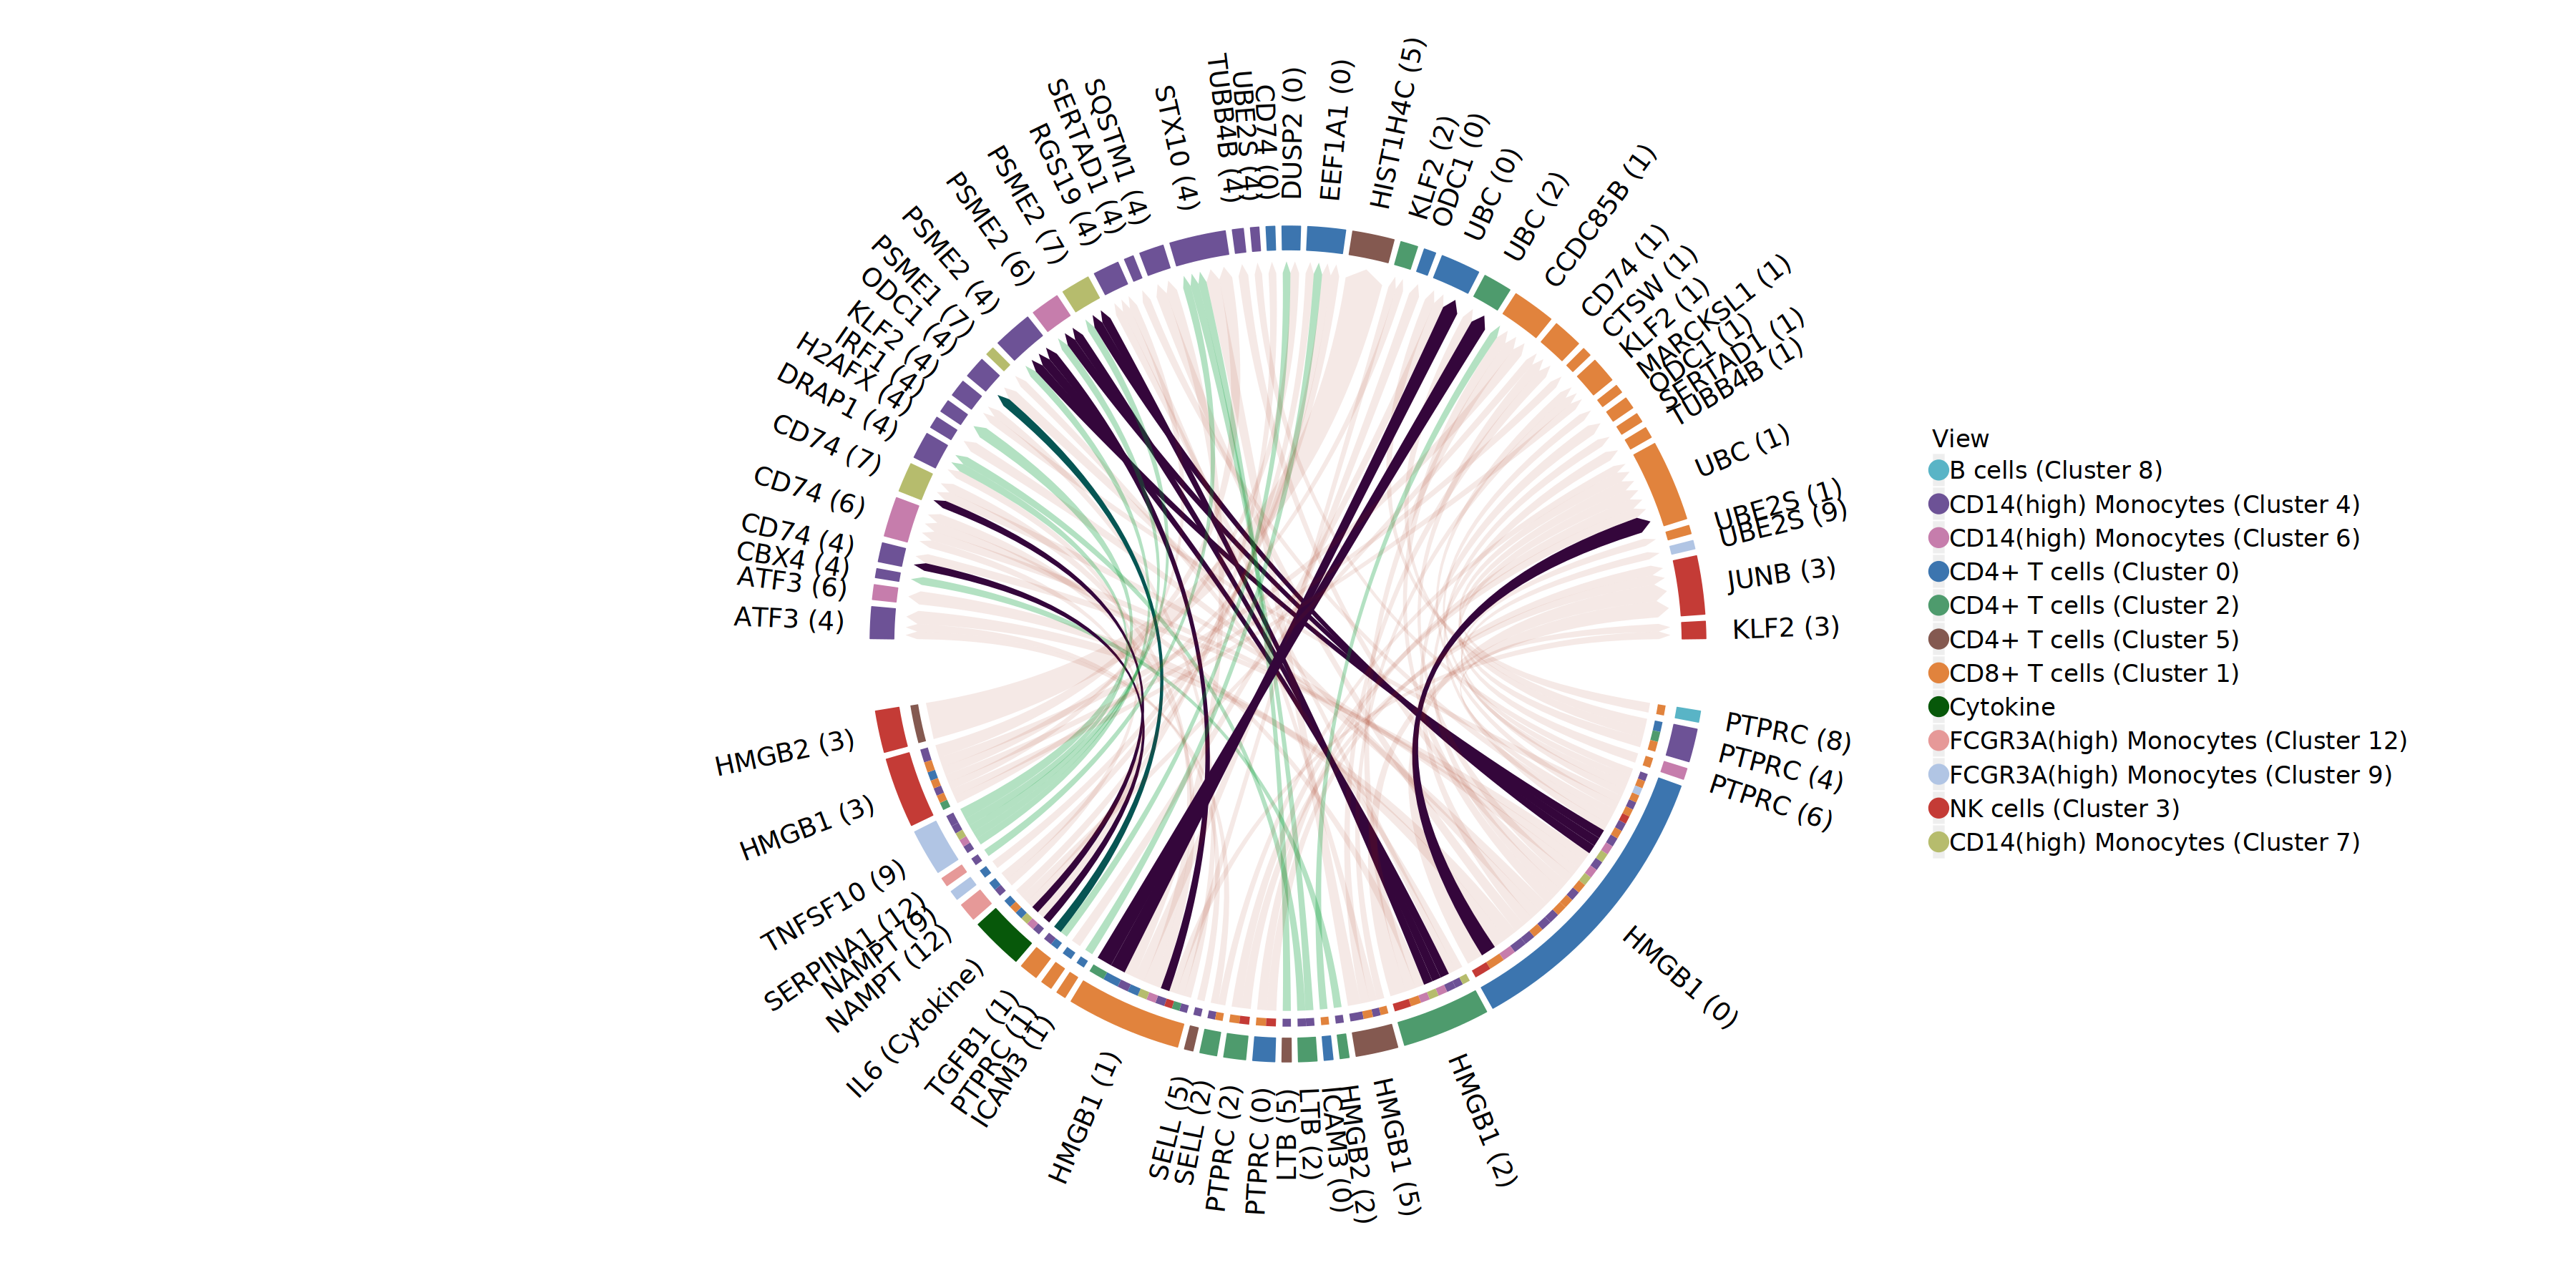

In [390]:
options(repr.plot.width=30, repr.plot.height=15)
chordDiagram(links_circle, directional = 1, order=order,link.sort = TRUE, link.decreasing = FALSE,col = col_mat, grid.col = grid_col, transparency = transparency, direction.type = c("diffHeight", "arrows"),  link.arr.type = "big.arrow", annotationTrack = c( "grid"), preAllocateTracks = 1, title(
    main = paste0('' ), cex.main = 1.5))
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  # sector.name = 
  circos.text(mean(xlim), ylim[1] + .1, text$text[text$variable == get.cell.meta.data("sector.index")], facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5),  cex = 1.8)
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0.2, sector.index = get.cell.meta.data("sector.index"), track.index = 2)
}, bg.border = NA)
### Add legend
draw(lgd_list_vertical, x = unit(1.5, "snpc"), just = "left")

In [391]:
## Save the figure

In [392]:
options(repr.plot.width=30, repr.plot.height=15)
if(use_thres == 'quant_new'){
    pdf(paste0('figures/Final_Figures/', figure_name, '_', factor, '_',name, '_', top_variable_fraction, '_', cor_thres,'_' ,str_replace(reg_pot_thres_var, '%', ''),geneset_oi_selection, filter_samples, '.pdf'), 
        width = 4, 
        height = 4)
    }


chordDiagram(links_circle, directional = 1, 
             order=order,link.sort = TRUE, 
             link.decreasing = FALSE,
             col = col_mat, 
             grid.col = grid_col, 
             transparency = transparency, 
             direction.type = c("diffHeight", "arrows"),  
             link.arr.type = "big.arrow", 
             annotationTrack = c( "grid"), 
             preAllocateTracks = 1, 
             title(main = paste0('Top ', top_variable_fraction *100, '% ', geneset_oi_selection, ' features' ), cex.main = 0.7))
circos.trackPlotRegion( track.height = 0.01, track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  # sector.name = 
  circos.text(mean(xlim), ylim[1] + .1, text$text[text$variable == get.cell.meta.data("sector.index")], cex = 0.5, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
  #circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0.2, sector.index = get.cell.meta.data("sector.index"), track.index = 2)
}, bg.border = NA)
### Add legend
draw(lgd_list_vertical, x = unit(1.5, "snpc"), just = "left")

dev.off()

png 
  2

### Generate a legend of the color scheme

In [393]:
head(color_scheme,2)

,color,cluster,color_R
,<chr>,<chr>,<chr>
1,#3c75af,CD4+ T cells (Cluster 0),#3c75af
2,#e1833d,CD8+ T cells (Cluster 1),#e1833d


In [394]:
legend_add = Legend(at = unique(color_scheme$cluster), type = "points", 
              labels_gp = gpar(fontsize = 20),
              grid_height = unit(20, "mm"), grid_width = unit(205, "mm"), gap = unit(0.1, "mm"),
              legend_gp =list(col = unique(color_scheme$color)), 
              title_position = "topleft", 
              title = "View", 
              title_gp = gpar(fontsize = 20),
              pch = 2, 
              size = unit(3, "mm"), ncol = 8)

No legend element is put in the last 2 columns under `ncol = 8`, maybe
you should set `by_row = TRUE`? Reset `ncol` to 6.



In [395]:
legend_add  = Legend(labels = unique(color_scheme$cluster), labels_gp = gpar(fontsize = 8),legend_gp =list(col = unique(c(unique(color_scheme$color)))), 
    nrow = 5, type = 'points') 

In [396]:
legend_add_vertical = packLegend(legend_add, direction = "horizontal")

In [397]:
pdf(paste0('figures/Final_Figures/Circo_Legend_Text', '.pdf'), 
    width =8.07, 
    height = 1)
draw(legend_add_vertical)
dev.off()

png 
  2

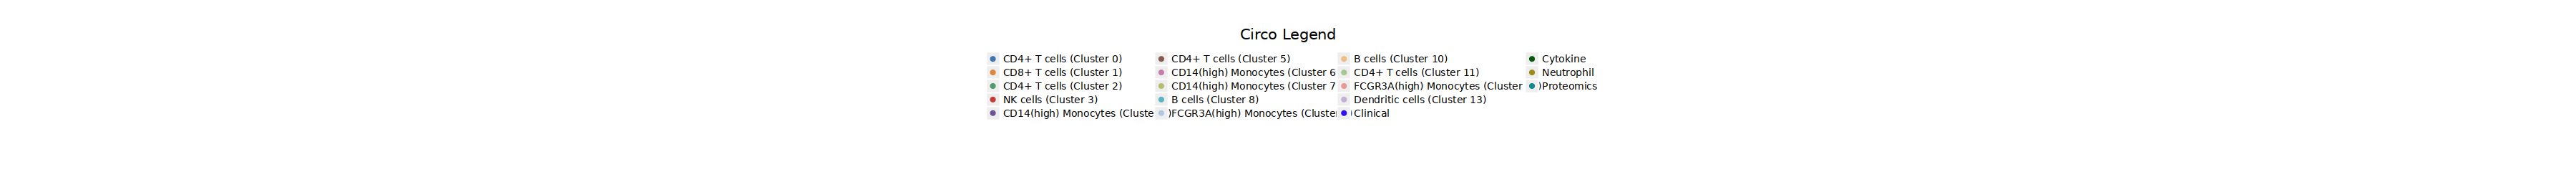

In [398]:
options(repr.plot.width=30, repr.plot.height=2)
draw(legend_add_vertical, test = "Circo Legend")

## Scatterplot for single correlations

In [399]:
## plot single correlations within scatterplot 

In [400]:
#head(data_long,2)

In [401]:
head(data_long_normalized,2)

,X,sample_id,variable,value,type
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1,k1,CK,-2.397022,clinical_data
2,2,k10,CK,NA,clinical_data


In [402]:
head(ligand_target_correlation,2)

V1,Ligand_Gene,Target_Gene,cluster,Ligand,Target,correlation,Target_Type,Ligand_Type,regulatory_potential,regulatory_potential_scaled,Target_Cell_Type,Ligand_Cell_Type,Ligand_Cluster_Text,Target_Cluster_Text,Ligand_Cluster_Number,Target_Cluster_Number
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADAM17,A1BG,proteomics,single_cell_0_X6_Monocytes...CD14__ADAM17,proteomics_0_A1BG_M0R009,-0.1841739,proteomics,single_cell_0_X6_Monocytes...CD14,0.0004622894,0.01667641,Proteomics,CD14(high) Monocytes,CD14(high) Monocytes (Cluster 6),Proteomics,6,Proteomics
2,ADAM17,A1BG,proteomics,single_cell_0_X4_Monocytes...CD14__ADAM17,proteomics_0_A1BG_M0R009,-0.1387664,proteomics,single_cell_0_X4_Monocytes...CD14,0.0004622894,0.01667641,Proteomics,CD14(high) Monocytes,CD14(high) Monocytes (Cluster 4),Proteomics,4,Proteomics


In [403]:
### List of features that should be visualized in scatterplot (shown in manuscript)

In [404]:
correlation_var1 = c(
    'single_cell_0_X1_T.cell.CD8__HMGB1',
    'single_cell_0_X0_T.cell.CD4__HMGB1',
    'cytokine_0_IL6__IL6',
    'cytokine_0_IL6__IL6',
    'cytokine_0_IL6__IL6',
    'single_cell_0_X0_T.cell.CD4__ICAM3',
    'single_cell_0_X0_T.cell.CD4__CALM1',
    'single_cell_0_X9_Monocytes...CD16_FCGR3A__NAMPT',
    'single_cell_0_X1_T.cell.CD8__TGFB1',
'single_cell_0_X8_B.cell__CALM1',
'cytokine_0_LIF__LIF')
correlation_var2 = c(
    'single_cell_0_X0_T.cell.CD4__UBC',
    'single_cell_0_X6_Monocytes...CD14__PSME2',
    'single_cell_0_X7_Monocytes...CD14__CD74',
    'single_cell_0_X7_Monocytes...CD14__VCAN',
    'single_cell_0_X4_Monocytes...CD14__PIM1',
    'single_cell_0_X1_T.cell.CD8__PTMA',
    'single_cell_0_X1_T.cell.CD8__PTMA',
    'single_cell_0_X5_T.cell.CD4__JUNB',
    'single_cell_0_X4_Monocytes...CD14__ODC1',
'single_cell_0_X0_T.cell.CD4__PTMA',
'single_cell_0_X0_T.cell.CD4__PTMA')

In [405]:
### Select the feature based on the number in the list above
correlation_var1 = correlation_var1[3]
correlation_var2 = correlation_var2[3]

In [406]:
### Generate the plot data for the scatterplots (filter on the selected features)

In [407]:
plot_data_normalized = data_long_normalized[(data_long_normalized$variable %in% c(str_replace(correlation_var1, '.*_0_', ''), str_replace(correlation_var2, '.*_0_', ''))),]

In [408]:
plot_data_normalized = plot_data_normalized %>% dcast(sample_id ~ variable, value.var = 'value')

In [409]:
plot_correlation = ligand_target_correlation[(ligand_target_correlation$Ligand == correlation_var1) &(ligand_target_correlation$Target == correlation_var2),] 

In [410]:
head(plot_correlation)

V1,Ligand_Gene,Target_Gene,cluster,Ligand,Target,correlation,Target_Type,Ligand_Type,regulatory_potential,regulatory_potential_scaled,Target_Cell_Type,Ligand_Cell_Type,Ligand_Cluster_Text,Target_Cluster_Text,Ligand_Cluster_Number,Target_Cluster_Number
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2170908,IL6,CD74,X7_Monocytes...CD14,cytokine_0_IL6__IL6,single_cell_0_X7_Monocytes...CD14__CD74,-0.5625561,single_cell_0_X7_Monocytes...CD14,cytokine,0.00126316,0.04556663,CD14(high) Monocytes,Cytokine,Cytokine,CD14(high) Monocytes (Cluster 7),Cytokine,7


In [411]:
plot_data_normalized = plot_data_normalized[,c('sample_id', str_replace(correlation_var1, '.*_0_', ''),str_replace(correlation_var2, '.*_0_', ''))]

In [412]:
# Specific Text Descriptions:
xlabel = xlab(paste0(plot_correlation$Target_Gene, ' (', plot_correlation$Target_Cluster_Number, ')'))
ylabel = ylab(paste0(plot_correlation$Ligand_Gene, ' (', plot_correlation$Ligand_Cluster_Number, ')'))

In [413]:
colnames(plot_data_normalized ) = c('sample_id', 'var1', 'var2')

In [414]:
plot_data_normalized = merge(plot_data_normalized, unique(sample_data[,c('sample_id', 'group', 'measurement', 'classification')]))

In [415]:
## Adjust sample meta-data columns in plot data

In [416]:
plot_data_normalized$class = plot_data_normalized$group

plot_data_normalized$measurement2 = plot_data_normalized$measurement

plot_data_normalized$measurement2[plot_data_normalized$class %in% c( 'ccs')] = 'CCS'
plot_data_normalized$measurement2[plot_data_normalized$class %in% c('no_ccs')] = 'No CCS'


In [417]:
figure_name = "FIG11_Scatter_"

In [418]:
# Sizes of the plot
width_par = 1.3
height_par = 1.6

In [419]:
if(plot_correlation$correlation > 0){
    annotations <- data.frame(
      xpos = c(-Inf), ypos =  c(-Inf),
      annotateText = paste0('cor = ', round(plot_correlation$correlation,2)),
      hjustvar = c(-0.9), #-0.1
      vjustvar = c(-1.4))
    }

if(plot_correlation$correlation < 0){
    annotations <- data.frame(
      xpos = c(-Inf), ypos =  c(-Inf),
      annotateText = paste0('cor = ', round(plot_correlation$correlation,2)),
      hjustvar = c(-0.1), #-0.1
      vjustvar = c(-1.5))
    }

In [420]:
if(plot_correlation$correlation < 0){

    scatter = ggplot(plot_data_normalized, aes(x=var2, y=var1)) +  # tbd whether normalized or not + color = measurement2
      geom_point(size=0.2) +
      geom_text(data = annotations, aes(x = xpos, y = ypos, hjust = hjustvar, vjust = vjustvar, label = annotateText), size = 2, color = 'red')+
      plot_config + ccs_tp_scatter + theme(axis.text.x = element_text(angle = 90), legend.position = 'none') + 
      xlabel +
      ylabel 
    }

if(plot_correlation$correlation > 0){
        scatter = ggplot(plot_data_normalized, aes(x=var2, y=var1)) +   # tbd whether normalized or not + color = measurement2
      geom_point(size=0.2) +
      geom_text(data = annotations, aes(x = xpos, y = ypos, hjust = hjustvar, vjust = vjustvar, label = annotateText), size = 2, color = 'darkgreen')+
      plot_config + ccs_tp_scatter + theme(axis.text.x = element_text(angle = 90), legend.position = 'none') +
      xlabel +
      ylabel
    }

In [421]:
## save the plot

In [422]:
pdf(paste0('figures/Final_Figures/', figure_name,plot_correlation$Ligand_Gene, plot_correlation$Target_Gene, filter_samples, '.pdf'), width =width_par, height =height_par)
print(scatter)
dev.off()
    

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


png 
  2

## For review: combined scatter and violin plots

In [423]:
#With adjusted color scheme and combined to violin plots

In [424]:
## Scatter Plots

In [425]:
if(plot_correlation$correlation < 0){

    scatter = ggplot(plot_data_normalized, aes(x=var2, y=var1, color = measurement2)) +  
      geom_point(size=0.2) +
      geom_text(data = annotations, aes(x = xpos, y = ypos, hjust = hjustvar, vjust = vjustvar, label = annotateText), size = 2, color = 'red')+
      plot_config + ccs_tp_scatter + theme(axis.text.x = element_text(angle = 90), legend.position = 'none') + 
      xlabel +
      ylabel 
    }

if(plot_correlation$correlation > 0){
        scatter = ggplot(plot_data_normalized, aes(x=var2, y=var1, color = measurement2)) +   # tbd whether normalized or not + color = measurement2
      geom_point(size=0.2) +
      geom_text(data = annotations, aes(x = xpos, y = ypos, hjust = hjustvar, vjust = vjustvar, label = annotateText), size = 2, color = 'darkgreen')+
      plot_config + ccs_tp_scatter + theme(axis.text.x = element_text(angle = 90), legend.position = 'none') +
      xlabel +
      ylabel
    }

In [426]:
### Violin Plots

In [427]:
### Filter violin plot data only on 'ccs' and 'acs_w_o_infection'

In [428]:
sample_filter = c('ccs', 'acs_w_o_infection')

In [429]:
violin_plot = ggplot(plot_data_normalized, aes(x=measurement, y= var2, fill = measurement)) + 
        geom_violin(trim=FALSE, size = 0.01)+ geom_sina(alpha=1, size = 0.001)  +
       # facet_grid(~  facet, scales = 'free', space = 'free',  switch = "y") +
        plot_config +
        theme(strip.background = element_rect(color="black", fill="white", linetype="solid"), strip.placement = "outside", strip.switch.pad.grid = unit(0.1, "cm"), axis.title.y = element_blank(), axis.title.x = element_blank(), panel.spacing = unit(0.1, "cm")) + 
        #ggtitle("Normalized Expression values") +
       # xlabel +
       # ylabel +
        ccs_tp_fill_scatter + theme(legend.position="none")   + ggtitle(paste0(plot_correlation$Target_Gene, ' (', plot_correlation$Target_Cluster_Number, ')'))  #+  stat_compare_means(aes(group = measurement), comparisons = list(c('TP0', 'TP1'), c('TP2', 'TP4'),c('TP1', 'TP4'), c('TP0', 'TP2')), size = 2 ,method = 't.test')

violin_plot2 = ggplot(plot_data_normalized, aes(x=measurement, y= var1, fill = measurement)) + 
        geom_violin(trim=FALSE, size = 0.01)+ geom_sina(alpha=1, size = 0.001)   +
       # facet_grid(~  facet, scales = 'free', space = 'free',  switch = "y") +
        plot_config +
        theme(strip.background = element_rect(color="black", fill="white", linetype="solid"), strip.placement = "outside", strip.switch.pad.grid = unit(0.1, "cm"), axis.title.y = element_blank(), axis.title.x = element_blank(), panel.spacing = unit(0.1, "cm")) + 
        #ggtitle("Normalized Expression values") +
       # xlabel +
       # ylabel +
        ccs_tp_fill_scatter + theme(legend.position="none")  + ggtitle(paste0(plot_correlation$Ligand_Gene, ' (', plot_correlation$Ligand_Cluster_Number, ')'))  #+  stat_compare_means(aes(group = measurement), comparisons = list(c('TP0', 'TP1'), c('TP2', 'TP4'),c('TP1', 'TP4'), c('TP0', 'TP2')), size = 2 ,method = 't.test')


Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_sina()`).”


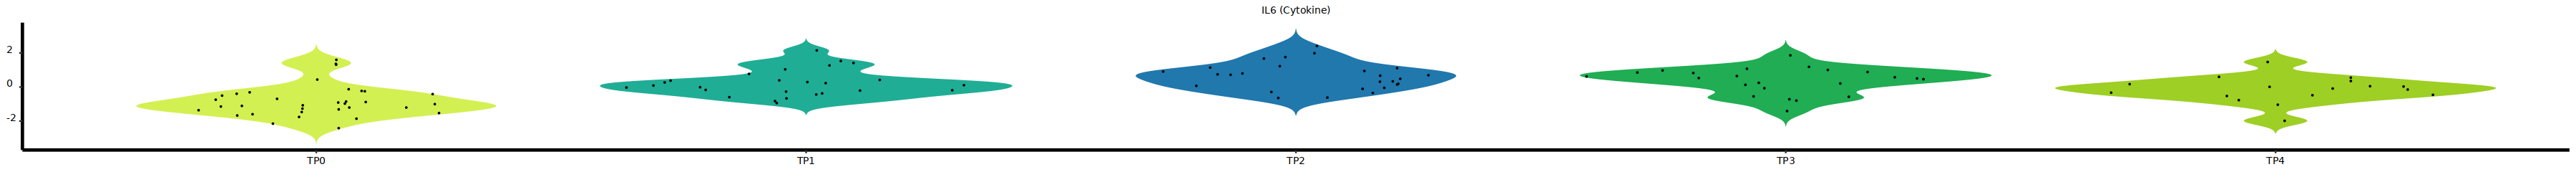

In [430]:
violin_plot2

In [431]:
### Combine in one plot

In [432]:
### save all in one combined pdf

In [433]:
figure_name = "REV12_Violin_and_Scatter_"

In [434]:
options(repr.plot.width=5, repr.plot.height=5)
pdf(paste0('figures/Review_Figures/', figure_name,correlation_var1, '_TG_', correlation_var2, filter_samples, '.pdf'), width =  4, height =4)
combined = ggarrange(violin_plot2,  scatter, violin_plot, 
          ncol = 2, nrow = 2)
print(combined)
dev.off()

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_sina()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 9 rows containing non-finite values (`stat_sina()`).”


png 
  2